<a href="https://colab.research.google.com/github/huyg1108/fruit-fresh-rotten/blob/main/fruit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fruits fresh and rotten

## Import các thư viện cần thiết

In [1]:
import os
import cv2
import zipfile
import random
import tempfile
from google.colab import files
from random import shuffle
from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

##Import data

In [2]:
!pip install kaggle

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"huyg1108","key":"8f0c2c5ab6b826e92d788ee4ce79693c"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

# download dataset
!kaggle datasets download -d sriramr/fruits-fresh-and-rotten-for-classification

100% 3.58G/3.58G [01:09<00:00, 47.9MB/s]
100% 3.58G/3.58G [01:09<00:00, 55.0MB/s]


In [5]:
# extract file .zip
with zipfile.ZipFile("fruits-fresh-and-rotten-for-classification.zip","r") as zip_ref:
  zip_ref.extractall("/tmp")

##Xử lý data

In [6]:
classes = ['freshapples', 'freshbanana','freshoranges','rottenapples','rottenbanana','rottenoranges']

In [7]:
# load train set
def load_data_train():
  x,y = [],[]
  z = []
  for i in tqdm(os.listdir('/tmp/dataset/train')):
    if classes[0] in i:
      path_main = os.path.join('/tmp/dataset/train',i)
      for img_name in os.listdir(path_main):
        img = cv2.imread(os.path.join(path_main,img_name))
        img = cv2.resize(img,(100, 100))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        z.append([img,0])
    elif classes[1] in i:
      path_main = os.path.join('/tmp/dataset/train',i)
      for img_name in os.listdir(path_main):
        img = cv2.imread(os.path.join(path_main,img_name))
        img = cv2.resize(img,(100, 100))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        z.append([img,1])
    elif classes[2] in i:
      path_main = os.path.join('/tmp/dataset/train',i)
      for img_name in os.listdir(path_main):
        img = cv2.imread(os.path.join(path_main, img_name))
        img = cv2.resize(img,(100, 100))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        z.append([img,2])
    elif classes[3] in i:
      path_main = os.path.join('/tmp/dataset/train',i)
      for img_name in os.listdir(path_main):
        img = cv2.imread(os.path.join(path_main, img_name))
        img = cv2.resize(img,(100, 100))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        z.append([img,3])
    elif classes[4] in i:
      path_main = os.path.join('/tmp/dataset/train',i)
      for img_name in os.listdir(path_main):
        img = cv2.imread(os.path.join(path_main, img_name))
        img = cv2.resize(img,(100, 100))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        z.append([img,4])
    elif classes[5] in i:
      path_main = os.path.join('/tmp/dataset/train',i)
      for img_name in os.listdir(path_main):
        img = cv2.imread(os.path.join(path_main, img_name))
        img = cv2.resize(img,(100, 100))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        z.append([img,5])

  shuffle(z)
  for images, labels in tqdm(z):
      x.append(images)
      y.append(labels)
  return x,y
  
# load test set
def load_data_test():
  x,y = [],[]
  z = []
  for i in tqdm(os.listdir('/tmp/dataset/test')):
    if classes[0] in i:
      path_main = os.path.join('/tmp/dataset/test',i)
      for img_name in os.listdir(path_main):
        img = cv2.imread(os.path.join(path_main, img_name))
        img = cv2.resize(img,(100, 100))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        z.append([img,0])
    elif classes[1] in i:
      path_main = os.path.join('/tmp/dataset/test',i)
      for img_name in os.listdir(path_main):
        img = cv2.imread(os.path.join(path_main, img_name))
        img = cv2.resize(img,(100, 100))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        z.append([img,1])
    elif classes[2] in i:
      path_main = os.path.join('/tmp/dataset/test',i)
      for img_name in os.listdir(path_main):
        img = cv2.imread(os.path.join(path_main, img_name))
        img = cv2.resize(img,(100, 100))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        z.append([img,2])
    elif classes[3] in i:
      path_main = os.path.join('/tmp/dataset/train',i)
      for img_name in os.listdir(path_main):
        img = cv2.imread(os.path.join(path_main, img_name))
        img = cv2.resize(img,(100, 100))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        z.append([img,3])
    elif classes[4] in i:
      path_main = os.path.join('/tmp/dataset/test',i)
      for img_name in os.listdir(path_main):
        img = cv2.imread(os.path.join(path_main, img_name))
        img = cv2.resize(img,(100, 100))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        z.append([img,4])
    elif classes[5] in i:
      path_main = os.path.join('/tmp/dataset/test',i)
      for img_name in os.listdir(path_main):
        img = cv2.imread(os.path.join(path_main, img_name))
        img = cv2.resize(img,(100, 100))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        z.append([img,5])

  shuffle(z)
  for images, labels in tqdm(z):
      x.append(images)
      y.append(labels)
  return x,y

In [8]:
x_train, y_train = load_data_train()
x_test, y_test = load_data_test()

100%|██████████| 4439/4439 [00:00<00:00, 863487.41it/s]


In [9]:
# chuyển thành numpy array
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [10]:
# validation set
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, stratify=y_train, test_size=0.4, shuffle=True, random_state=42
)

print('x_train shape:',x_train.shape)
print('y_train shape:',y_train.shape)
print('x_val shape:',x_val.shape)
print('y_val shape:',y_val.shape)
print('x_test shape:',x_test.shape)
print('y_test shape:',y_test.shape)

x_train shape: (6540, 100, 100, 3)
y_train shape: (6540,)
x_val shape: (4361, 100, 100, 3)
y_val shape: (4361,)
x_test shape: (4439, 100, 100, 3)
y_test shape: (4439,)


In [11]:
# scale x
x_train = x_train/255
x_val = x_val/255
x_test = x_test/255

# to categorical y
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

##Training

In [12]:
from tensorflow.random import set_seed
from tensorflow.keras.backend import clear_session
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import *

In [13]:
set_seed(42)
np.random.seed(42)
clear_session()

# model structure
model = Sequential()

model.add(Conv2D(32,3,padding='same',activation='relu',input_shape=(100,100,3)))
model.add(MaxPool2D())
model.add(Dropout(0.2))
model.add(Conv2D(64,3,padding='same',activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.2))
model.add(Conv2D(128,3,padding='same',activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(6,activation='softmax'))

In [14]:
stop =  EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_val,y_val), epochs=1000, callbacks=[stop])

Epoch 1/1000
205/205 [==============================] - 40s 46ms/step - loss: 1.4275 - accuracy: 0.4887 - val_loss: 0.5008 - val_accuracy: 0.8358
Epoch 2/1000
205/205 [==============================] - 8s 39ms/step - loss: 0.4335 - accuracy: 0.8412 - val_loss: 0.3110 - val_accuracy: 0.8996
Epoch 3/1000
205/205 [==============================] - 8s 40ms/step - loss: 0.2809 - accuracy: 0.8934 - val_loss: 0.2855 - val_accuracy: 0.8986
Epoch 4/1000
205/205 [==============================] - 8s 39ms/step - loss: 0.2977 - accuracy: 0.8882 - val_loss: 0.2316 - val_accuracy: 0.9172
Epoch 5/1000
205/205 [==============================] - 8s 39ms/step - loss: 0.1875 - accuracy: 0.9286 - val_loss: 0.2017 - val_accuracy: 0.9312
Epoch 6/1000
205/205 [==============================] - 8s 39ms/step - loss: 0.1515 - accuracy: 0.9446 - val_loss: 0.3122 - val_accuracy: 0.8828
Epoch 7/1000
205/205 [==============================] - 8s 40ms/step - loss: 0.1399 - accuracy: 0.9490 - val_loss: 0.1704 - val_a

In [15]:
model.evaluate(x_test, y_test)

139/139 [==============================] - 2s 12ms/step - loss: 0.0663 - accuracy: 0.9802


[0.06625183671712875, 0.9801757335662842]

##Learning curve

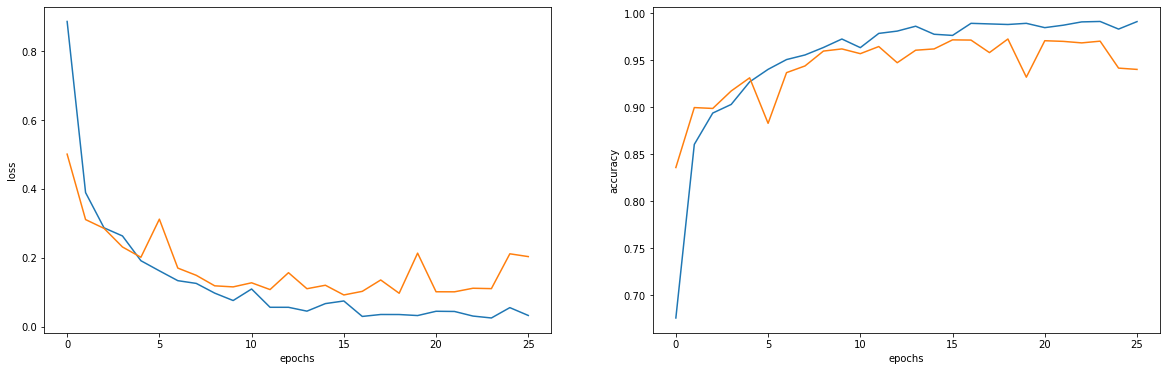

In [16]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.subplot(1,2,2)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

## Demo

Saving received_239907854542485.jpeg to received_239907854542485.jpeg
Saving received_477603563434632.jpeg to received_477603563434632.jpeg
Saving received_582689739372944.jpeg to received_582689739372944.jpeg
Saving received_915061046005016.jpeg to received_915061046005016.jpeg


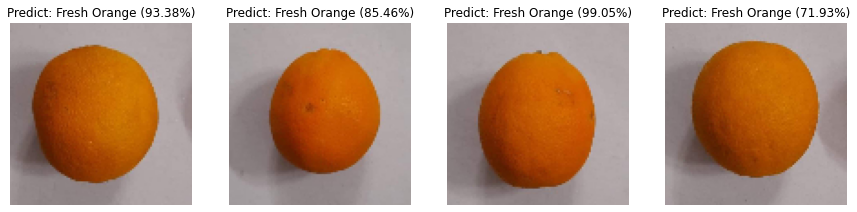

In [31]:
import pathlib
from keras.utils import get_file
from keras.preprocessing import image

uploaded_file = files.upload()
img_name = []
img_conf = []
predict_result = []

for i in uploaded_file.keys():
  path = i
  img = image.load_img(path, color_mode="rgb", target_size=(100, 100), interpolation="nearest")
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img = img/255

  images = np.vstack([img])
  classes = model.predict(images, batch_size=10)

  max = np.amax(classes[0])
  if np.where(classes[0] == max)[0] == 0:
    img_name.append(i)
    img_conf.append(max)
    predict_result.append('Fresh Apple')
  elif np.where(classes[0] == max)[0] == 1:
    img_name.append(i)
    img_conf.append(max)
    predict_result.append('Fresh Banana')
  elif np.where(classes[0] == max)[0] == 2:
    img_name.append(i)
    img_conf.append(max)
    predict_result.append('Fresh Orange')
  elif np.where(classes[0] == max)[0] == 3:
    img_name.append(i)
    img_conf.append(max)
    predict_result.append('Rotten Apple')
  elif np.where(classes[0] == max)[0] == 4:
    img_name.append(i)
    img_conf.append(max)
    predict_result.append('Rotten Banana')
  else:
    img_name.append(i)
    img_conf.append(max)
    predict_result.append('Rotten Orange')

plt.figure(figsize=(15, 15))
for i in range(len(img_name)):
  plt.subplot((len(img_name)/4)+1, 4, i+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image.load_img(img_name[i], color_mode="rgb", target_size=(100, 100), interpolation="nearest"))
  title = f"Predict: {predict_result[i]} ({round(float(img_conf[i])*100, 2)}%)"
  plt.title(title, color='black')
  plt.axis('off')
plt.show()

for fn in img_name:
  os.system(f'rm {fn}')